<a href="https://colab.research.google.com/github/raclan/KDDM_2022/blob/main/ImPastaCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
from google.colab import drive

In [79]:
!curl -$ https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'
100  8827    0  8827    0     0  98077      0 --:--:-- --:--:-- --:--:-- 98077
curl: (23) Failed writing body (725 != 1360)


In [80]:
!pip install torch torchvision   # install pytorch

In [81]:
#Import Libraries
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import helper

In [82]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [83]:
!/opt/bin/nvidia-smi  #show GPU 

Thu Apr 28 16:11:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    28W /  70W |   1350MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [84]:
args={}
args['batch_size']=100
args['test_batch_size']=100
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset. 
args['lr']=0.01 #Learning rate is how fast it will decend. 
args['log_interval']=1

In [85]:
# # build an mlp
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
        
#         self.fc1 = nn.Linear(128*128, 64*64)
#         self.fc2 = nn.Linear(64*64, 32*32)
#         self.fc3 = nn.Linear(32*32, 256)
#         self.fc4 = nn.Linear(256, 128) 
#         self.fc5 = nn.Linear(128, 64)
#         self.fc6 = nn.Linear(64, 7)

#     def forward(self, x):
#         h0 = x.view(-1,128*128) #input layer
#         h1 = F.relu(self.fc1(h0)) # hidden layer 1
#         h2 = F.relu(self.fc2(h1)) # hidden layer 2
#         h3 = F.relu(self.fc3(h2))
#         h4 = F.relu(self.fc4(h3))
#         h5 = F.relu(self.fc5(h4))
#         h6 = self.fc6(h5) # output layer

#         return h6

# model = Net()
# model.cuda() # put the model on GPU
# print(model)

In [86]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3) #3 in_channels, 32 out_channels, kernel size of 3
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64*3*3, 64*3)
        self.fc2 = nn.Linear(64*3, 5)
       # self.fc3 = nn.Linear(64, 5)
       # self.fc4 = nn.Linear(16*16, 64)
       # self.fc5 = nn.Linear(64, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 64*3*3)
        #x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
       # x = F.relu(self.fc2(x))
       # x = F.relu(self.fc3(x))
       # x = F.relu(self.fc4(x))
        x = self.fc2(x)
        return x

model = Net()
model.cuda() # put the model on GPU
print(model)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=192, bias=True)
  (fc2): Linear(in_features=192, out_features=5, bias=True)
)


In [87]:
# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(),lr = args['lr'])

In [88]:
# pip install split-folders

In [89]:
# import splitfolders

# splitfolders.ratio('gdrive/My Drive/Temple/KDDM Project/unique', output='gdrive/My Drive/Temple/KDDM Project/test', seed=9, ratio=(.8, .2), group_prefix=None, move=False)

In [90]:
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True

In [91]:
data_transform = transforms.Compose([transforms.Resize(40), transforms.CenterCrop(20), transforms.ToTensor()])
#data_transform = torch.nn.Sequential(transforms.Resize(255), transforms.CenterCrop(128))


train_datasets = datasets.ImageFolder(root='gdrive/My Drive/Temple/KDDM Project/RGBA/train', transform=data_transform)
train_dataloaders = torch.utils.data.DataLoader(train_datasets, batch_size=100, shuffle=True, num_workers=2)

test_datasets = datasets.ImageFolder(root='gdrive/My Drive/Temple/KDDM Project/RGBA/test', transform=data_transform)
test_dataloaders = torch.utils.data.DataLoader(test_datasets, batch_size=100, shuffle=True, num_workers=2)

In [92]:
# def pil_loader(path):
#     # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
#     with open(path, 'rb') as f:
#         img = Image.open(f)
#         return img.convert('RGBA')

In [93]:
# from PIL import Image

# pil_loader('gdrive/My Drive/Spring 2022/KDDM/Final Project/test/train/penne/images90.jpg')

In [94]:
# os.chdir('gdrive/My Drive/Spring 2022/KDDM/Final Project/RGBA/train/penne')
# os.getcwd()

In [95]:
# os.chdir('../../../../../../../..')
# os.getcwd()

In [96]:
# #make new folders containing images converted to RGBA
# import os

# traintest = ['train', 'test']
# pastas = ['rigatoni', 'cappelletti', 'farfalle', 'tagliatelle']

# for pasta in pastas:
#   for tt in traintest:
#     for image in os.listdir('gdrive/My Drive/Spring 2022/KDDM/Final Project/test/' + tt + '/' + pasta):
#       im = Image.open('gdrive/My Drive/Spring 2022/KDDM/Final Project/test/' + tt + '/' + pasta + '/' + image)
#       if im.mode is not 'RGBA':
#         os.chdir('gdrive/My Drive/Spring 2022/KDDM/Final Project/RGBA/' + tt + '/' + pasta)
#         im.convert("RGBA").save(f"{image}2.png")
#         os.chdir('../../../../../../../..')

In [97]:
# # helper function to un-normalize and display an image
# def imshow(img):
#     #img = img / 2 + 0.5  # unnormalize
#     plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    

# totensor = transforms.ToTensor
# dataiter = iter(train_dataloaders)
# images, labels = dataiter.next()
# images = images.numpy() # convert images to numpy for display
# # plot the images in the batch, along with the corresponding labels
# fig = plt.figure(figsize=(25, 4))
# # display 20 images
# for idx in np.arange(20):
#     ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
#     imshow(images[idx])

In [98]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_dataloaders):
        data, target = data.cuda(), target.cuda()
        
        output = model(data)
        loss = criterion(output, target)
        train_losses.append(loss.cpu().detach().numpy())

        # compute gradients
        optimizer.zero_grad()
        loss.backward()

        #to do a one-step update on our parameter.
        optimizer.step()

        #Print out the loss periodically. 
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_dataloaders.dataset),
                100. * batch_idx / len(train_dataloaders), loss.item()))

In [99]:
def test():
    model.eval() #do not update parameters anymore
    test_loss = 0
    correct = 0
    for data, target in test_dataloaders:
        data, target = data.cuda(), target.cuda()

        output = model(data)
        test_loss += criterion(output, target).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] 
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_dataloaders.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_dataloaders.dataset),
        100. * correct / len(test_dataloaders.dataset)))
    test_acc.append(100. * correct / len(test_dataloaders.dataset))


In [100]:
train_losses = []
test_acc = []
for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/2304 (0%)]	Loss: 1.599584
Train Epoch: 1 [100/2304 (4%)]	Loss: 1.616084
Train Epoch: 1 [200/2304 (8%)]	Loss: 1.612977
Train Epoch: 1 [300/2304 (12%)]	Loss: 1.604790
Train Epoch: 1 [400/2304 (17%)]	Loss: 1.619478
Train Epoch: 1 [500/2304 (21%)]	Loss: 1.613896
Train Epoch: 1 [600/2304 (25%)]	Loss: 1.615506
Train Epoch: 1 [700/2304 (29%)]	Loss: 1.609528
Train Epoch: 1 [800/2304 (33%)]	Loss: 1.612676
Train Epoch: 1 [900/2304 (38%)]	Loss: 1.609308
Train Epoch: 1 [1000/2304 (42%)]	Loss: 1.619708
Train Epoch: 1 [1100/2304 (46%)]	Loss: 1.610758
Train Epoch: 1 [1200/2304 (50%)]	Loss: 1.610151
Train Epoch: 1 [1300/2304 (54%)]	Loss: 1.608312
Train Epoch: 1 [1400/2304 (58%)]	Loss: 1.614841
Train Epoch: 1 [1500/2304 (62%)]	Loss: 1.606851
Train Epoch: 1 [1600/2304 (67%)]	Loss: 1.613181
Train Epoch: 1 [1700/2304 (71%)]	Loss: 1.609383
Train Epoch: 1 [1800/2304 (75%)]	Loss: 1.619590
Train Epoch: 1 [1900/2304 (79%)]	Loss: 1.611504
Train Epoch: 1 [2000/2304 (83%)]	Loss: 1.613973
Train E

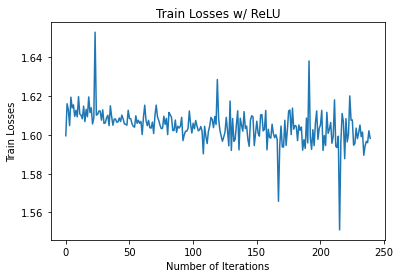

In [101]:
import matplotlib.pyplot as plt

plt.plot(train_losses)
plt.xlabel('Number of Iterations')
plt.ylabel('Train Losses')
plt.title('Train Losses w/ ReLU')
plt.show()

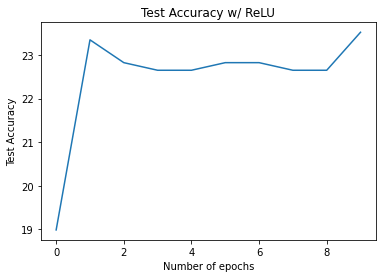

In [102]:
plt.plot(test_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy w/ ReLU')
plt.show()